## This Notebook contains the code of the project, Which was basically a hackathon hosted on Machinehack.com. In this Hackathon the participants have to devlop a machine learning model which can predict the cost of used cars on the basis of features provided.

##  It was 1 month long challange and the  the higher score corresponds to a better rank on the leaderboard.

![alt text](https://www.machinehack.com/wp-content/uploads/2019/05/Predicting-The-Costs-Of-Used-Cars-Hackathon-By-Imarticus-1-1-768x432.jpg)

---

## Following was the format of the provided data.

Size of training set: 6,019 records

Size of test set: 1,234 records

FEATURES:

Name: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

New_Price: The price of a new car of the same model.

Price: The price of the used car in INR Lakhs.

-----

----

### Price was the target variable which was essentially the cost of the car in lakh.

### The evaluation metric was RMSLE.
Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the predicted value and observed score values. The final score calculation is done in the following way:

Submissions are evaluated on Root-Mean-Squared-Log-Error (RMSLE) error = RMSLE (error)

Score = 1 – error

#### Let's have a look at the data provided.

In [1]:
# importing dependency.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#loading the training set.
train_data=pd.read_excel('Data_Train.xlsx')

In [4]:
## First five rows of the provided data.
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


***The name,location,fuel_ Type,Transmission,owner_type are text feature***

***Price is the target variable***

***Seats,kilometer and year are numerical features***

---
---

#### Let's check for null values.

In [9]:
# Getting a missing % count
all_data_missing = (train_data.isnull().sum() / len(train_data)) * 100
all_data_missing = all_data_missing.drop(all_data_missing[all_data_missing == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Percentage':all_data_missing})
missing_data.head(30)

,Missing Percentage
New_Price,86.310018
Seats,0.697790
Power,0.598106
Engine,0.598106
Mileage,0.033228


***As we can see that 5 features have a missing values .So they must be imputed with a suitable value***

----
----
----

#### Let's load the provided test data and analyse it a little bit.

In [10]:
#loading the provided test data.
test_data=pd.read_excel('Data_Test.xlsx')

In [12]:
#first five rows of the test set.
test_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


#### The test data looks pretty much of same format as train set only difference is that it has price feature missing ,which is to be predicted.

In [13]:
#Missing values in test set
# Getting a missing % count
all_data_missing = (test_data.isnull().sum() / len(test_data)) * 100
all_data_missing = all_data_missing.drop(all_data_missing[all_data_missing == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Percentage':all_data_missing})
missing_data.head(30)

,Missing Percentage
New_Price,85.251216
Seats,0.891410
Power,0.810373
Engine,0.810373


#### This shows the percentage of missing values present in different column in test set.

----
----
----

## ***It is quite obvious from the upper discussion that both train and test set needs a lot of preprocessing before feeding them to machine learning models and deriving the results.***

### Now I will discuss all the data preprocessing steps I took to make the data suitable for fitting to a ML model.

### I'll also discuss the crucial features that I generated in order to make the model strong enough to give  better results.

## *** Let's start.***

* First task is to replace NULL values from various columns with suitable values.

* secondly the categorical test features such as transmission, owner_type must to encoded suitably because ml model expects numerical values to show their magic(except newly launched cat boost library).

* Some features like power,engine and mileage are combination of numbers and text , so the next work will be to seperate the numerical value from text.

***There are many more preprocessing steps involved but start with this first***

### Time for some feature genation.

>* If we will closely look at the name feature which contains text data, basically it contains the name and model of the car being sold.

> * On observing this feature we can be sure that it contains very important information which might be very useful because a BMW with most of the features same as marutiSuzuki will have a higher price.

> * The New_Price feature has maximum values as null.After a little bit of reserch it comes out that it was because that paritcular model of the car is now not being made by the company.so we can generate a new feature named is_available, it will have value as 1 if the New_price will have non null value otherwise it will contain zero.

## *After applying all the above proposed technique the transformed data frame will look something like this.*

In [65]:
all_data=pd.read_csv('final_train_test.csv')
all_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,company,model,has_expired,mileage,engine,power
0,9,2010,72000,0,1,0,5.0,19,130,1,26.60,998,58.16
1,10,2015,41000,1,1,0,5.0,11,68,1,19.67,1582,126.20
2,2,2011,46000,4,1,0,5.0,10,63,0,18.20,1199,88.70
3,2,2012,87000,1,1,0,7.0,19,117,1,20.77,1248,88.76
4,3,2013,40670,1,0,2,5.0,1,2,1,15.20,1968,140.80


In [66]:
# information about the data frame
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 13 columns):
Location             7252 non-null int64
Year                 7252 non-null int64
Kilometers_Driven    7252 non-null int64
Fuel_Type            7252 non-null int64
Transmission         7252 non-null int64
Owner_Type           7252 non-null int64
Seats                7252 non-null float64
company              7252 non-null int64
model                7252 non-null int64
has_expired          7252 non-null int64
mileage              7252 non-null float64
engine               7252 non-null int64
power                7252 non-null float64
dtypes: float64(3), int64(10)
memory usage: 736.6 KB


### The above analysis shows that the dataframe now only contains numerical values and no null values.



#### Let's now go into the minute details of the preprocessing step.
* First up- Imputing null values.
> Imputing the missing value can be done by taking the average of the column ans impute it in place of null .
But it turns out that it is not a very good idea.
But why?

   > It turns out that imuting the null value to a particular car category say BMW by averaging the      values of only BMW from whole dataset will make more sense.Because the price difference of a BMW      with a honda car will be huge. 

### *After performing all the suggested steps and combing training and teasting data together the dataset will look like this.*

In [67]:
all_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,company,model,has_expired,mileage,engine,power
0,9,2010,72000,0,1,0,5.0,19,130,1,26.60,998,58.16
1,10,2015,41000,1,1,0,5.0,11,68,1,19.67,1582,126.20
2,2,2011,46000,4,1,0,5.0,10,63,0,18.20,1199,88.70
3,2,2012,87000,1,1,0,7.0,19,117,1,20.77,1248,88.76
4,3,2013,40670,1,0,2,5.0,1,2,1,15.20,1968,140.80


In [68]:
## chaging zero with 1 and 1 with 4 because the on applying sklearn labelencoder the test is converted to numerical 
## value is a random way. But values in owner feature have sense in the order.
all_data.Owner_Type=all_data.Owner_Type.astype(str)

all_data=all_data.replace({'Owner_Type':{'0':1,'1':4}})

all_data.Owner_Type=all_data.Owner_Type.astype(int)


In [69]:
## generating a new feature we will see later if it be helpful to the model or not.
all_data['new_k']=(all_data.Kilometers_Driven%100)

#### The response variable for the training set is contained in response.csv.let's load it.

In [70]:
y=pd.read_csv('response.csv')

### Since all data contains both training and testing set ,we have to split it to get traing and testing set back.

In [71]:
## X - training set data
## test - testing set data.
X = all_data.iloc[:6018,:]
test = all_data.iloc[6018:,:]

In [72]:
# first five rows of the training set.
X.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,company,model,has_expired,mileage,engine,power,new_k
0,9,2010,72000,0,1,1,5.0,19,130,1,26.60,998,58.16,0
1,10,2015,41000,1,1,1,5.0,11,68,1,19.67,1582,126.20,0
2,2,2011,46000,4,1,1,5.0,10,63,0,18.20,1199,88.70,0
3,2,2012,87000,1,1,1,7.0,19,117,1,20.77,1248,88.76,0
4,3,2013,40670,1,0,2,5.0,1,2,1,15.20,1968,140.80,70


In [73]:
## concatenating response variable of the training set  to the features  of training set.
train=pd.concat([X,y],axis=1)

### *One of the most important preprocessing step which proved to be very fruitful was mean encoding or target encoding.*
> It is basically encoding the categorical features according to the target value or the response value.But it should be done in a way which must eliminate overfitting.Because it is very much prone to overfitting.

In [74]:
from sklearn import model_selection

In [75]:
## Applying mean encoding to various categorical features.
kf = model_selection.KFold(5, shuffle=False)
train['fuel_target_enc'] = np.nan

In [76]:
for tr_ind, val_ind in kf.split(train):
    X_tr, X_val = train.iloc[tr_ind], train.iloc[val_ind]
    train.loc[train.index[val_ind], 'fuel_target_enc'] = X_val['Fuel_Type'].map(X_tr.groupby('Fuel_Type').Price.mean())

In [77]:
train['owner_target_enc'] = np.nan
for tr_ind, val_ind in kf.split(train):
    X_tr, X_val = train.iloc[tr_ind], train.iloc[val_ind]
    train.loc[train.index[val_ind], 'owner_target_enc'] = X_val['Owner_Type'].map(X_tr.groupby('Owner_Type').Price.mean())

In [78]:
train['company_target_enc'] = np.nan
for tr_ind, val_ind in kf.split(train):
    X_tr, X_val = train.iloc[tr_ind], train.iloc[val_ind]
    train.loc[train.index[val_ind], 'company_target_enc'] = X_val['company'].map(X_tr.groupby('company').Price.mean())

In [79]:
train['location_target_enc'] = np.nan
for tr_ind, val_ind in kf.split(train):
    X_tr, X_val = train.iloc[tr_ind], train.iloc[val_ind]
    train.loc[train.index[val_ind], 'location_target_enc'] = X_val['Location'].map(X_tr.groupby('Location').Price.mean())

In [80]:
train['year_target_enc'] = np.nan
for tr_ind, val_ind in kf.split(train):
    X_tr, X_val = train.iloc[tr_ind], train.iloc[val_ind]
    train.loc[train.index[val_ind], 'year_target_enc'] = X_val['Year'].map(X_tr.groupby('Year').Price.mean())

In [81]:
train['transmission_target_enc'] = np.nan
for tr_ind, val_ind in kf.split(train):
    X_tr, X_val = train.iloc[tr_ind], train.iloc[val_ind]
    train.loc[train.index[val_ind], 'transmission_target_enc'] = X_val['Transmission'].map(X_tr.groupby('Transmission').Price.mean())

In [82]:
train['seats_target_enc'] = np.nan
for tr_ind, val_ind in kf.split(train):
    X_tr, X_val = train.iloc[tr_ind], train.iloc[val_ind]
    train.loc[train.index[val_ind], 'seats_target_enc'] = X_val['Seats'].map(X_tr.groupby('Seats').Price.mean())

In [83]:
train['exp_target_enc'] = np.nan
for tr_ind, val_ind in kf.split(train):
    X_tr, X_val = train.iloc[tr_ind], train.iloc[val_ind]
    train.loc[train.index[val_ind], 'exp_target_enc'] = X_val['has_expired'].map(X_tr.groupby('has_expired').Price.mean())

In [84]:
train['model_target_enc'] = np.nan
for tr_ind, val_ind in kf.split(train):
    X_tr, X_val = train.iloc[tr_ind], train.iloc[val_ind]
    train.loc[train.index[val_ind], 'model_target_enc'] = X_val['model'].map(X_tr.groupby('model').Price.mean())

### *After mean encoding  the categorical features our data set looks like this.But mother feature must be removed from which the mean encoded features have been generated.*

In [85]:
X=train.drop(['Price'],axis=1)
y=train.Price

In [86]:
X.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,company,model,has_expired,...,new_k,fuel_target_enc,owner_target_enc,company_target_enc,location_target_enc,year_target_enc,transmission_target_enc,seats_target_enc,exp_target_enc,model_target_enc
0,9,2010,72000,0,1,1,5.0,19,130,1,...,0,3.670204,9.734647,4.508873,8.916895,5.583191,5.307179,8.296371,8.714744,2.862951
1,10,2015,41000,1,1,1,5.0,11,68,1,...,0,12.755169,9.734647,5.437851,6.569940,10.810441,5.307179,8.296371,8.714744,12.314684
2,2,2011,46000,4,1,1,5.0,10,63,0,...,0,5.524928,9.734647,5.421044,7.960734,6.687938,5.307179,8.296371,13.161160,6.007660
3,2,2012,87000,1,1,1,7.0,19,117,1,...,0,12.755169,9.734647,4.508873,7.960734,7.386825,5.307179,14.725047,8.714744,6.958929
4,3,2013,40670,1,0,2,5.0,1,2,1,...,70,12.755169,7.676917,25.422818,14.604500,8.809942,19.573368,8.296371,8.714744,18.757313


In [87]:
y.head()

0     1.75
1    12.50
2     4.50
3     6.00
4    17.74
Name: Price, dtype: float64

In [88]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6018 entries, 0 to 6017
Data columns (total 23 columns):
Location                   6018 non-null int64
Year                       6018 non-null int64
Kilometers_Driven          6018 non-null int64
Fuel_Type                  6018 non-null int64
Transmission               6018 non-null int64
Owner_Type                 6018 non-null int32
Seats                      6018 non-null float64
company                    6018 non-null int64
model                      6018 non-null int64
has_expired                6018 non-null int64
mileage                    6018 non-null float64
engine                     6018 non-null int64
power                      6018 non-null float64
new_k                      6018 non-null int64
fuel_target_enc            6018 non-null float64
owner_target_enc           6018 non-null float64
company_target_enc         6010 non-null float64
location_target_enc        6018 non-null float64
year_target_enc            6016 n

In [89]:
## Dropping original features
new_X=X.drop(['Location','Year','Fuel_Type','Owner_Type','company','Transmission','Seats','has_expired','model'],axis=1)

In [90]:
#final dataset view
new_X.head()

,Kilometers_Driven,mileage,engine,power,new_k,fuel_target_enc,owner_target_enc,company_target_enc,location_target_enc,year_target_enc,transmission_target_enc,seats_target_enc,exp_target_enc,model_target_enc
0,72000,26.60,998,58.16,0,3.670204,9.734647,4.508873,8.916895,5.583191,5.307179,8.296371,8.714744,2.862951
1,41000,19.67,1582,126.20,0,12.755169,9.734647,5.437851,6.569940,10.810441,5.307179,8.296371,8.714744,12.314684
2,46000,18.20,1199,88.70,0,5.524928,9.734647,5.421044,7.960734,6.687938,5.307179,8.296371,13.161160,6.007660
3,87000,20.77,1248,88.76,0,12.755169,9.734647,4.508873,7.960734,7.386825,5.307179,14.725047,8.714744,6.958929
4,40670,15.20,1968,140.80,70,12.755169,7.676917,25.422818,14.604500,8.809942,19.573368,8.296371,8.714744,18.757313


In [92]:
new_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6018 entries, 0 to 6017
Data columns (total 14 columns):
Kilometers_Driven          6018 non-null int64
mileage                    6018 non-null float64
engine                     6018 non-null int64
power                      6018 non-null float64
new_k                      6018 non-null int64
fuel_target_enc            6018 non-null float64
owner_target_enc           6018 non-null float64
company_target_enc         6010 non-null float64
location_target_enc        6018 non-null float64
year_target_enc            6016 non-null float64
transmission_target_enc    6018 non-null float64
seats_target_enc           6014 non-null float64
exp_target_enc             6018 non-null float64
model_target_enc           5977 non-null float64
dtypes: float64(11), int64(3)
memory usage: 658.3 KB


### The above analysis shows that the newly generated features have some null values, so we must impute them. 

In [93]:
new_X.company_target_enc=new_X.company_target_enc.fillna(value=new_X.company_target_enc.mean())

In [94]:
new_X.year_target_enc=new_X.year_target_enc.fillna(value=new_X.year_target_enc.mean())

In [95]:
new_X.seats_target_enc=new_X.seats_target_enc.fillna(value=new_X.seats_target_enc.mean())

In [99]:
new_X.model_target_enc=new_X.model_target_enc.fillna(value=new_X.model_target_enc.mean())

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(new_X,y,random_state=42)

In [101]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4513 entries, 3043 to 860
Data columns (total 14 columns):
Kilometers_Driven          4513 non-null int64
mileage                    4513 non-null float64
engine                     4513 non-null int64
power                      4513 non-null float64
new_k                      4513 non-null int64
fuel_target_enc            4513 non-null float64
owner_target_enc           4513 non-null float64
company_target_enc         4513 non-null float64
location_target_enc        4513 non-null float64
year_target_enc            4513 non-null float64
transmission_target_enc    4513 non-null float64
seats_target_enc           4513 non-null float64
exp_target_enc             4513 non-null float64
model_target_enc           4513 non-null float64
dtypes: float64(11), int64(3)
memory usage: 528.9 KB


## Training on first split and testing on another split

In [102]:
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(n_estimators=450,learning_rate=0.2,max_depth=5,random_state=42)
gb.fit(X_train,y_train)
gb_pred=gb.predict(X_test)
score=mean_squared_log_error(np.absolute(y_test),np.absolute(gb_pred))
print(1-score)

0.9729101488114139


In [103]:
gb.feature_importances_

array([0.02755588, 0.01386491, 0.03245831, 0.18272505, 0.00224686,
       0.00502778, 0.0007928 , 0.17973021, 0.0079809 , 0.14307715,
       0.00254139, 0.00541551, 0.00231519, 0.39426808])

## Now it's time to convert the testing dataset in the same format as the training dataset.
## So the features mean encoded in training data needs to be mean encoded in test data also

In [104]:
## test data view
test.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,company,model,has_expired,mileage,engine,power,new_k
6018,4,2014,40929,0,1,1,4.0,19,111,1,32.26,998,58.20,29
6019,3,2013,54493,4,1,2,5.0,19,111,1,24.70,796,47.30,93
6020,9,2017,34000,1,1,1,7.0,30,205,0,13.68,2393,147.80,0
6021,5,2012,139000,1,1,1,5.0,30,203,1,23.59,1364,67.04,0
6022,9,2014,29000,4,1,1,5.0,11,81,1,18.50,1197,82.85,0


#### Mean encoding the test features

In [105]:
rename_dict = X.set_index('Fuel_Type').to_dict()['fuel_target_enc']
test.Fuel_Type=test.Fuel_Type.map(rename_dict)

In [109]:
rename_dict = X.set_index('Location').to_dict()['location_target_enc']
test.Location=test.Location.map(rename_dict)

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [110]:
rename_dict = X.set_index('Transmission').to_dict()['transmission_target_enc']
test.Transmission=test.Transmission.map(rename_dict)

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [112]:
rename_dict = X.set_index('Owner_Type').to_dict()['owner_target_enc']
test.Owner_Type=test.Owner_Type.map(rename_dict)

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [113]:
rename_dict = X.set_index('Seats').to_dict()['seats_target_enc']
test.Seats=test.Seats.map(rename_dict)

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [114]:
rename_dict = X.set_index('company').to_dict()['company_target_enc']
test.company=test.company.map(rename_dict)

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [115]:
rename_dict = X.set_index('has_expired').to_dict()['exp_target_enc']
test.has_expired=test.has_expired.map(rename_dict)

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [117]:
rename_dict = X.set_index('Year').to_dict()['year_target_enc']
test.Year=test.Year.map(rename_dict)

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [118]:
rename_dict = X.set_index('model').to_dict()['model_target_enc']
test.model=test.model.map(rename_dict)

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [119]:
test.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,company,model,has_expired,mileage,engine,power,new_k
6018,9.330000,9.643573,40929,3.473043,5.328809,9.954673,20.450779,4.541807,2.497768,8.743045,32.26,998,58.20,29
6019,15.178324,8.294990,54493,5.666791,5.328809,7.723660,8.492256,4.541807,2.497768,8.743045,24.70,796,47.30,93
6020,9.473553,13.812505,34000,12.876555,5.328809,9.954673,14.839834,11.599853,12.196739,14.277300,13.68,2393,147.80,0
6021,9.626222,7.397407,139000,12.876555,5.328809,9.954673,8.492256,11.599853,4.180800,8.743045,23.59,1364,67.04,0
6022,9.473553,9.643573,29000,5.666791,5.328809,9.954673,8.492256,5.264588,5.019744,8.743045,18.50,1197,82.85,0


In [120]:
test.shape

(1234, 14)

In [121]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 6018 to 7251
Data columns (total 14 columns):
Location             1234 non-null float64
Year                 1233 non-null float64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null float64
Transmission         1234 non-null float64
Owner_Type           1234 non-null float64
Seats                1234 non-null float64
company              1230 non-null float64
model                1224 non-null float64
has_expired          1234 non-null float64
mileage              1234 non-null float64
engine               1234 non-null int64
power                1234 non-null float64
new_k                1234 non-null int64
dtypes: float64(11), int64(3)
memory usage: 135.1 KB


In [122]:
test.Year=test.Year.fillna(value=1.7433)
test.company=test.company.fillna(value=test.company.mean())
test.model=test.model.fillna(value=test.model.mean())

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [127]:
test['fuel_target_enc']=test.Fuel_Type

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [128]:
test['owner_target_enc']=test.Owner_Type
test['company_target_enc']=test.company
test['location_target_enc']=test.Location
test['year_target_enc']=test.Year
test['transmission_target_enc']=test.Transmission
test['seats_target_enc']=test.Seats
test['exp_target_enc']=test.has_expired
test['model_target_enc']=test.model


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

In [130]:
test.drop(['Location','Year','Fuel_Type','Owner_Type','company','Transmission','Seats','has_expired','model'],axis=1,inplace=True)

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [131]:
## Final testing data
test.head()

,Kilometers_Driven,mileage,engine,power,new_k,fuel_target_enc,owner_target_enc,company_target_enc,location_target_enc,year_target_enc,transmission_target_enc,seats_target_enc,exp_target_enc,model_target_enc
6018,40929,32.26,998,58.20,29,3.473043,9.954673,4.541807,9.330000,9.643573,5.328809,20.450779,8.743045,2.497768
6019,54493,24.70,796,47.30,93,5.666791,7.723660,4.541807,15.178324,8.294990,5.328809,8.492256,8.743045,2.497768
6020,34000,13.68,2393,147.80,0,12.876555,9.954673,11.599853,9.473553,13.812505,5.328809,14.839834,14.277300,12.196739
6021,139000,23.59,1364,67.04,0,12.876555,9.954673,11.599853,9.626222,7.397407,5.328809,8.492256,8.743045,4.180800
6022,29000,18.50,1197,82.85,0,5.666791,9.954673,5.264588,9.473553,9.643573,5.328809,8.492256,8.743045,5.019744


In [132]:
## final training data
new_X.head()

,Kilometers_Driven,mileage,engine,power,new_k,fuel_target_enc,owner_target_enc,company_target_enc,location_target_enc,year_target_enc,transmission_target_enc,seats_target_enc,exp_target_enc,model_target_enc
0,72000,26.60,998,58.16,0,3.670204,9.734647,4.508873,8.916895,5.583191,5.307179,8.296371,8.714744,2.862951
1,41000,19.67,1582,126.20,0,12.755169,9.734647,5.437851,6.569940,10.810441,5.307179,8.296371,8.714744,12.314684
2,46000,18.20,1199,88.70,0,5.524928,9.734647,5.421044,7.960734,6.687938,5.307179,8.296371,13.161160,6.007660
3,87000,20.77,1248,88.76,0,12.755169,9.734647,4.508873,7.960734,7.386825,5.307179,14.725047,8.714744,6.958929
4,40670,15.20,1968,140.80,70,12.755169,7.676917,25.422818,14.604500,8.809942,19.573368,8.296371,8.714744,18.757313


In [133]:
## Importing gradient boosting,fitting and predicting.
gb=GradientBoostingRegressor(n_estimators=500,learning_rate=0.1,max_depth=5)
gb.fit(new_X,y)
gb_pred=gb.predict(test)

In [134]:
## Final prediction
gb_pred

array([ 2.67357102,  3.03980917, 17.30499553, ...,  3.09934336,
        4.38265971, 17.78486766])

In [96]:
#sub.Price=gb_pred
#writer = 'output2_mean_enc_gb.xlsx'
#sub.to_excel(writer,sheet_name='sheet20')

In [136]:
from xgboost import XGBRegressor
xgb=XGBRegressor(n_estimators=750,learning_rate=0.05,max_depth=5)
xgb.fit(new_X,y)
xgb_pred=xgb.predict(test)
#sub.Price=xgb_pred
#writer = 'output2_mean_enc_xgb.xlsx'
#sub.to_excel(writer,sheet_name='sheet15')

In [137]:
## Final prediction by xgboost
xgb_pred

array([ 2.8063858,  3.054585 , 16.979044 , ...,  2.9878216,  4.4241   ,
       18.006674 ], dtype=float32)

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 9.47 and sigma = 11.16



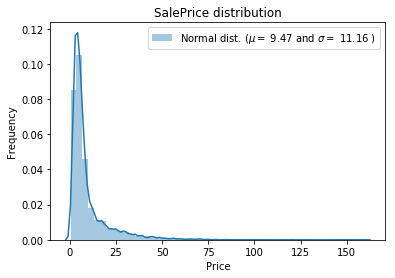

In [116]:
'''(mu, sigma) = norm.fit(y)

# 1. Plot Sale Price
sns.distplot(y);
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))'''

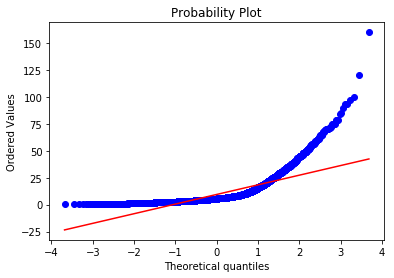

In [118]:
"""from scipy.stats import probplot
import stats
import matplotlib.pyplot as plt
fig = plt.figure()
res = probplot(y, plot=plt)
plt.show()"""

In [119]:
yy=np.log1p(y)

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'SalePrice distribution')

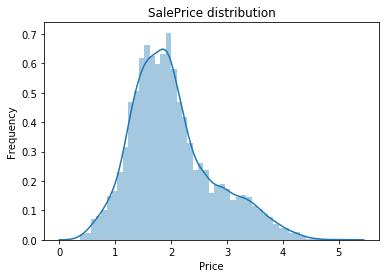

In [120]:
"""yy=np.log1p(y)
sns.distplot(yy);
plt.ylabel('Frequency')
plt.title('SalePrice distribution')"""

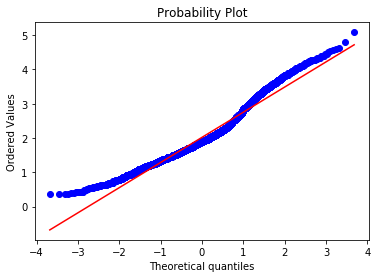

In [121]:
"""fig = plt.figure()
res = probplot(yy, plot=plt)
plt.show()"""

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 9.48 and sigma = 3.56



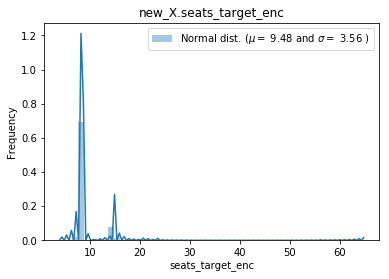

In [122]:
"""(mu, sigma) = norm.fit(new_X.seats_target_enc)

# 1. Plot Sale Price
sns.distplot(new_X.seats_target_enc);
plt.ylabel('Frequency')
plt.title('new_X.seats_target_enc')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))"""